In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df= pd.read_excel('after_EDA_final_dd.xlsx')

In [3]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS  ... DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0                   A  ...              0.0  -67.06  80.0  26.083333   
1                   A  ...              0.0   13.70  63.0  26.000000   
2                   A  ...              0.0  812.40  61.0  26.000000   
3                   A  ...              0.0  128.78  56.0  25.916667   
4                   A  ...              0.0 -100.63  60.0  25.916667   

  CUSTOMER_DEBIT_ACC CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                  3                       0.00                    0   
1                  0                       0.00                    0   
2                  1                   47205.46                    0   
3                  1                  170194.41                    0   
4                  1                   37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0              15.657527  3713.374413  
2                          0.0               5.319444     9.591558  
3                          0.0              49.102532    95.901806  
4                          0.0              18.551333    66.104647  

[5 rows x 39 columns]

In [4]:
df.shape

(24875, 39)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = df[df['CR_CARD_OVERDUE_STATUS'] == 'G']

In [8]:
df.shape

(22896, 39)

In [19]:
df_selected = df[['STR_CR_CARD_NUM', 'AVG_LIMIT_UTILIZATION','AGE', 'PAYMENT_AVG', 'CC_AGE','CUSTOMER_PROFITABILITY','CUSTOMER_DEBIT_ACC_BALANCE',
    
                ]]

In [20]:
df_selected.head()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233  80.0     8.008889  26.083333   
1  4157380000060029              15.657527  63.0  3713.374413  26.000000   
2  4157380000066018               5.319444  61.0     9.591558  26.000000   
3  4157380000072008              49.102532  56.0    95.901806  25.916667   
4  4157380000089002              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [21]:
df_selected.shape

(22896, 7)

In [22]:
# Assuming 'df_selected' is your DataFrame
df_new = df_selected.drop(columns=['STR_CR_CARD_NUM'],axis=1)
df_new.head()

AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0               8.782233  80.0     8.008889  26.083333   
1              15.657527  63.0  3713.374413  26.000000   
2               5.319444  61.0     9.591558  26.000000   
3              49.102532  56.0    95.901806  25.916667   
4              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [23]:
df_new.shape

(22896, 6)

In [24]:
df_new.dtypes

AVG_LIMIT_UTILIZATION         float64
AGE                           float64
PAYMENT_AVG                   float64
CC_AGE                        float64
CUSTOMER_PROFITABILITY        float64
CUSTOMER_DEBIT_ACC_BALANCE    float64
dtype: object

In [25]:
df_new.isna().sum()

AVG_LIMIT_UTILIZATION         0
AGE                           0
PAYMENT_AVG                   0
CC_AGE                        0
CUSTOMER_PROFITABILITY        0
CUSTOMER_DEBIT_ACC_BALANCE    0
dtype: int64

In [38]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(df_new))

In [39]:
X = np.asarray(X)

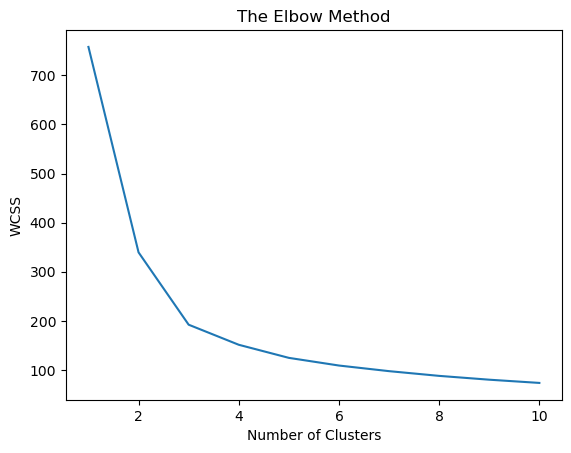

In [40]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=500, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is your feature matrix (DataFrame or ndarray)

n_clusters = 3

# Initialize the clusterer with n_clusters value and a random generator
# seed of 42 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=400, random_state=45862)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5137311932891977


In [50]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Assuming cluster_labels contains the assigned cluster labels
# and X is your feature matrix (DataFrame or ndarray)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, cluster_labels)

# Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, cluster_labels)

print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz_index)


Davies-Bouldin Index: 0.6649102875382229
Silhouette Score: 0.5137311932891977
Calinski-Harabasz Index: 33643.82651379646


In [42]:
df_selected['cluster_label'] = cluster_labels

# Create a dictionary to store dataframes for each cluster
cluster_dataframes = {}

# Iterate over each cluster label
for cluster_num in range(n_clusters):
    # Filter the original DataFrame to create a dataframe for the current cluster
    cluster_dataframes[f'df_cluster_{cluster_num}'] = df_selected[df_selected['cluster_label'] == cluster_num].copy()

# Now cluster_dataframes is a dictionary containing separate dataframes for each cluster
# Each dataframe is stored with a variable name like df_cluster_0, df_cluster_1, etc.

# Print the first few rows of each cluster dataframe
for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"{cluster_name} dataframe:")
    print(cluster_df.head())
    print()


df_cluster_0 dataframe:
       STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG    CC_AGE  \
234   4157385011587001               5.333333  44.0     8.325423  5.250000   
3303  4157385100001278              21.149053  57.0   256.316192  4.416667   
3304  4157385100001310               8.765667  44.0  1228.701031  4.916667   
3306  4157385100001401              11.387315  35.0     2.034920  4.833333   
3307  4157385100001468              16.666667  63.0    85.330076  4.750000   

      CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
234                 11167.52                  1521493.47              0  
3303                 3232.51                    80146.60              0  
3304                73204.07                 67848952.83              0  
3306                39130.84                   758654.86              0  
3307                 1028.17                    39945.75              0  

df_cluster_1 dataframe:
     STR_CR_CARD_NUM  AVG_LIMIT_UTILIZ

In [43]:
cluster_counts = pd.Series(cluster_labels).value_counts()
cluster_counts

0    15184
1     6597
2     1115
Name: count, dtype: int64

In [44]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_0 = cluster_dataframes['df_cluster_0']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_0.head())


       STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG    CC_AGE  \
234   4157385011587001               5.333333  44.0     8.325423  5.250000   
3303  4157385100001278              21.149053  57.0   256.316192  4.416667   
3304  4157385100001310               8.765667  44.0  1228.701031  4.916667   
3306  4157385100001401              11.387315  35.0     2.034920  4.833333   
3307  4157385100001468              16.666667  63.0    85.330076  4.750000   

      CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
234                 11167.52                  1521493.47              0  
3303                 3232.51                    80146.60              0  
3304                73204.07                 67848952.83              0  
3306                39130.84                   758654.86              0  
3307                 1028.17                    39945.75              0  


In [45]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_1 = cluster_dataframes['df_cluster_1']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_1.head())


     STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
30  4157384100160002              10.352531  56.0    24.616585  11.000000   
34  4157384100176016              20.337778  43.0 -5955.293805  10.583333   
35  4157384100184002              20.342613  59.0   433.649013  10.583333   
36  4157384100189001              14.115669  53.0   161.854385  10.583333   
37  4157384100192005               7.360236  71.0    23.663818  10.583333   

    CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
30                 1839.97                    16104.00              1  
34                34398.63                 14339386.76              1  
35                  120.47                     7368.99              1  
36                 8835.77                  2549595.99              1  
37                 3909.88                   326386.86              1  


In [46]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_2 = cluster_dataframes['df_cluster_2']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_2.head())

    STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233  80.0     8.008889  26.083333   
1  4157380000060029              15.657527  63.0  3713.374413  26.000000   
2  4157380000066018               5.319444  61.0     9.591558  26.000000   
3  4157380000072008              49.102532  56.0    95.901806  25.916667   
4  4157380000089002              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
0                  -67.06                        0.00              2  
1                   13.70                        0.00              2  
2                  812.40                    47205.46              2  
3                  148.78                   170194.41              2  
4                  249.37                    37060.15              2  


In [47]:
df_cluster_0.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION           AGE   PAYMENT_AVG  \
count     1.518400e+04           15184.000000  15184.000000  1.518400e+04   
mean      4.381266e+15              19.417548     39.515171  1.751282e+03   
std       3.428489e+14              18.829504     11.475929  1.559939e+05   
min       4.157385e+15               5.000000     20.000000 -9.822795e+04   
25%       4.157390e+15               8.064486     30.000000  2.769678e+01   
50%       4.284170e+15              13.375416     37.000000  7.295219e+01   
75%       4.284174e+15              24.045917     47.000000  1.324172e+02   
max       5.583398e+15             525.701521     98.000000  1.908896e+07   

             CC_AGE  CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  \
count  15184.000000            1.518400e+04                1.518400e+04   
mean       2.542106            6.957142e+03                2.075714e+06   
std        1.196900            4.773813e+04                1.830493e+07   
min        1.000000           -3.550918e+06                0.000000e+00   
25%        1.583333            0.000000e+00                0.000000e+00   
50%        2.250000            1.130585e+03                2.579783e+04   
75%        3.333333            4.779880e+03                3.213840e+05   
max        5.750000            2.088898e+06                1.522944e+09   

       cluster_label  
count        15184.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0

In [48]:
df_cluster_1.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION          AGE    PAYMENT_AVG  \
count     6.597000e+03            6597.000000  6597.000000    6597.000000   
mean      4.347979e+15              18.059727    49.441167     184.190400   
std       3.868710e+14              22.438101    11.910510    6339.786899   
min       4.157384e+15               5.000000    23.000000  -84126.066914   
25%       4.157385e+15               7.530111    40.000000      24.055634   
50%       4.157390e+15              11.962963    48.000000      64.387012   
75%       4.284170e+15              20.953742    57.000000     111.757712   
max       5.583390e+15             520.236240   231.000000  414072.633329   

            CC_AGE  CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  \
count  6597.000000            6.597000e+03                6.597000e+03   
mean      7.986686            9.842792e+03                3.106311e+06   
std       2.008239            6.151102e+04                1.928530e+07   
min       1.833333           -7.283043e+05                0.000000e+00   
25%       6.500000            0.000000e+00                0.000000e+00   
50%       7.583333            1.204120e+03                4.259023e+04   
75%       9.250000            5.782230e+03                6.475932e+05   
max      13.500000            2.999834e+06                8.603636e+08   

       cluster_label  
count         6597.0  
mean             1.0  
std              0.0  
min              1.0  
25%              1.0  
50%              1.0  
75%              1.0  
max              1.0

In [49]:
df_cluster_2.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION          AGE   PAYMENT_AVG  \
count     1.115000e+03            1115.000000  1115.000000   1115.000000   
mean      4.415410e+15              18.671388    58.041319     91.032748   
std       5.251835e+14              18.400095    10.548407   1162.050252   
min       4.157380e+15               5.009056    18.000000 -20673.095443   
25%       4.157385e+15               8.212763    50.000000     20.868898   
50%       4.157385e+15              12.823810    57.000000     63.351279   
75%       4.157389e+15              22.985567    65.000000    114.332534   
max       5.488070e+15             250.113571    94.000000  19386.572818   

            CC_AGE  CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  \
count  1115.000000             1115.000000                1.115000e+03   
mean     18.931988             5099.113713                1.265250e+06   
std       2.821694            16961.169347                4.584095e+06   
min      13.333333            -4375.110000                0.000000e+00   
25%      16.916667                0.000000                0.000000e+00   
50%      18.583333              595.110000                1.571124e+04   
75%      20.750000             3343.525000                4.065469e+05   
max      26.833333           285380.480000                5.996063e+07   

       cluster_label  
count         1115.0  
mean             2.0  
std              0.0  
min              2.0  
25%              2.0  
50%              2.0  
75%              2.0  
max              2.0